In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
data.shape

(11251, 15)

In [5]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop blank columns
data.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check for the null values
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop the null values
data.dropna(inplace= True)

In [11]:
data.shape

(11239, 13)

In [12]:
#change the data type
data['Amount'] = data['Amount'].astype('int')

In [13]:
data['Amount'].dtypes

dtype('int64')

In [14]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
#rename the column
#data.rename(columns= {'Marital_Status':'Married_or_Unmarried'})

# Exploratory Data Analysis

Gender

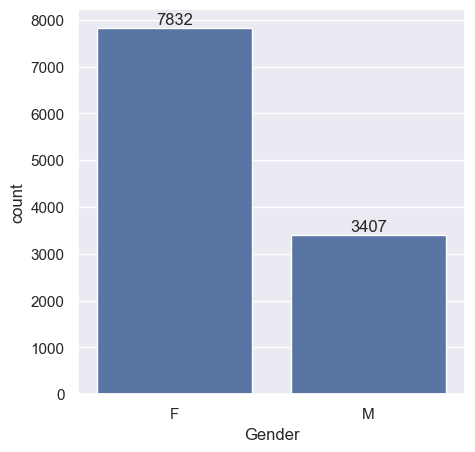

In [39]:
ax = sns.countplot(x = 'Gender',data = data) 
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show() 

In [17]:
data.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

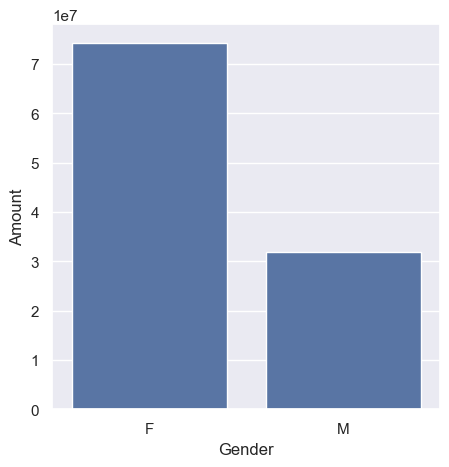

In [41]:
sales_gen = data.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x = 'Gender' , y = 'Amount', data = sales_gen)


Age

<Axes: xlabel='Age Group', ylabel='count'>

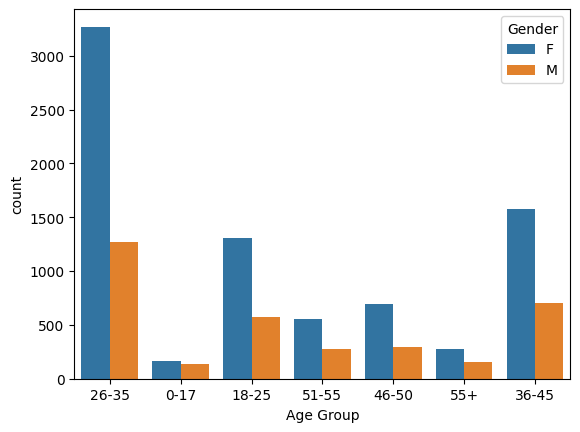

In [19]:
sns.countplot(data = data, x = 'Age Group', hue='Gender')

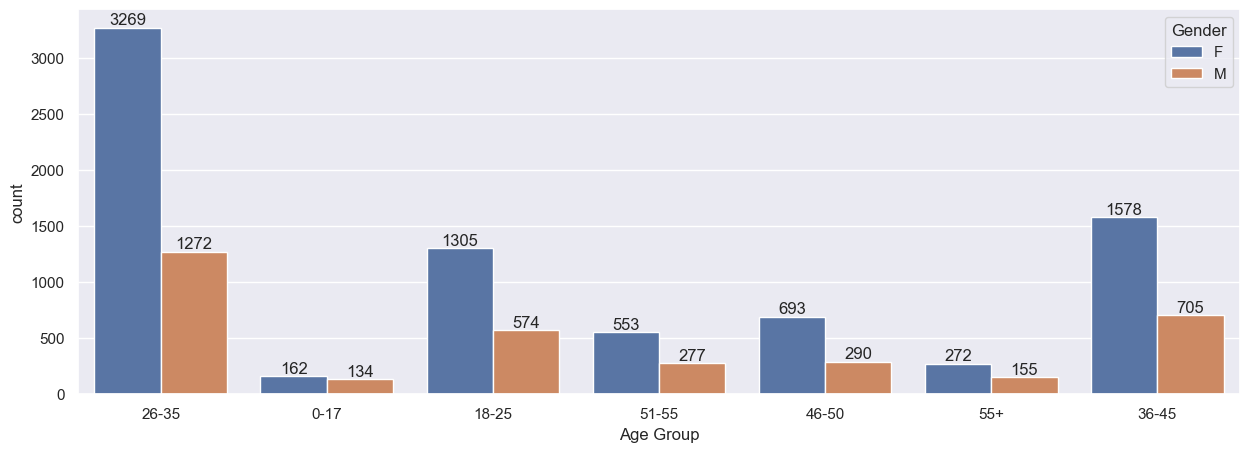

In [44]:
ax = sns.countplot(data = data, x = 'Age Group', hue='Gender')
sns.set(rc = {'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show() 

<Axes: xlabel='Age Group', ylabel='Amount'>

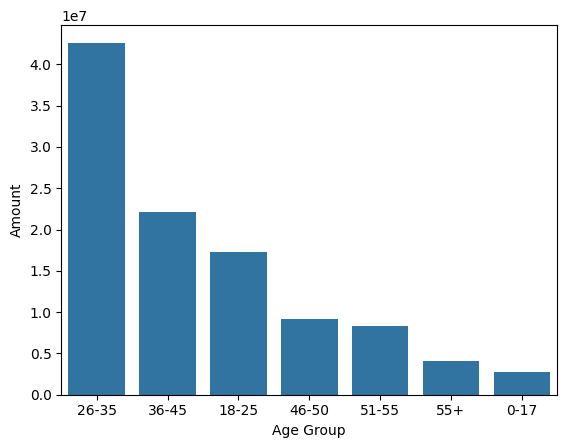

In [21]:
#Total Amount vs Group
sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount' , data = sales_age)

State

Total number of orders from top 10 states :

<Axes: xlabel='State', ylabel='Orders'>

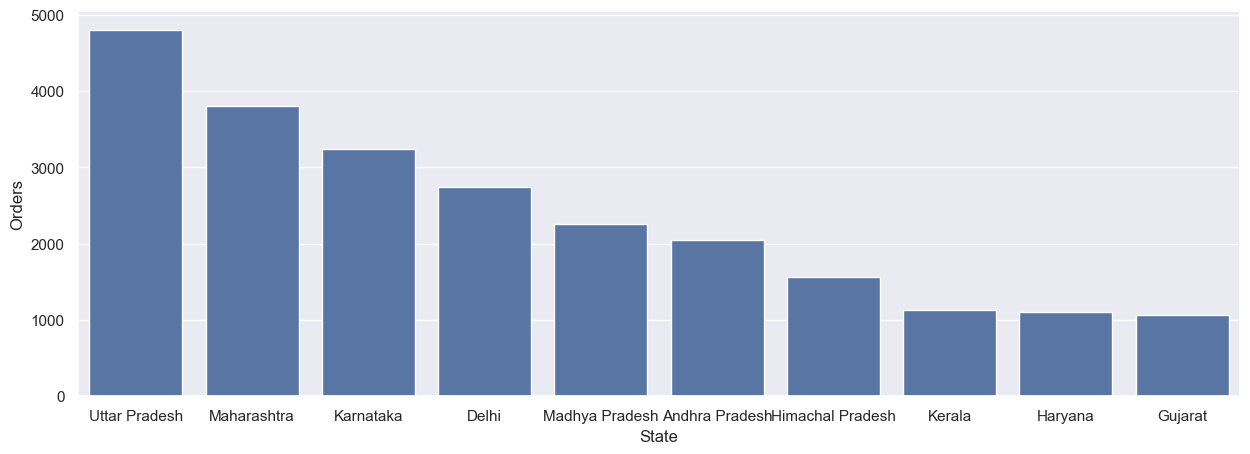

In [22]:
sales_state = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State' , y = 'Orders')

Total amount/sales from top 10 states :

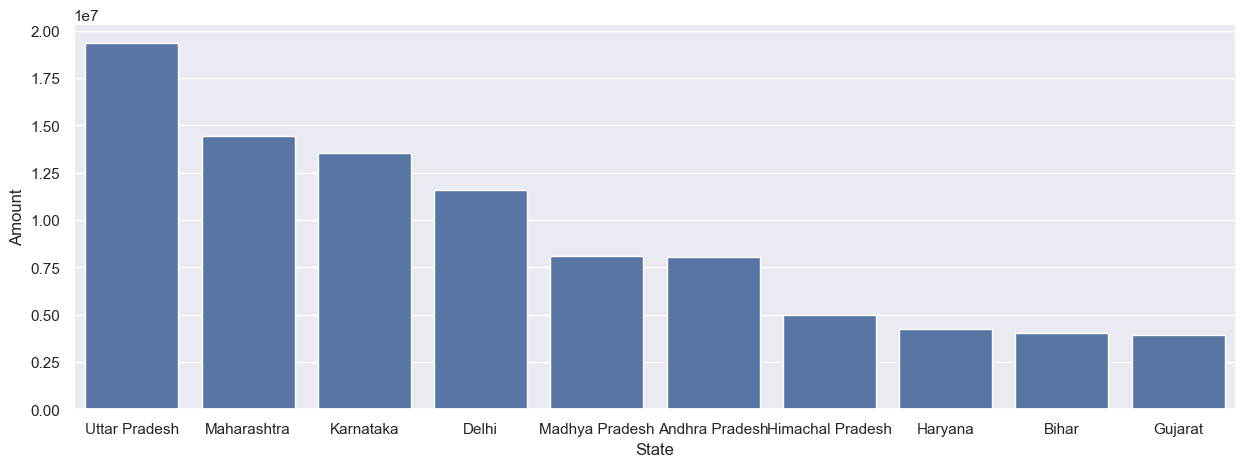

In [45]:
sales_state = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State' , y = 'Amount')

Marital Status

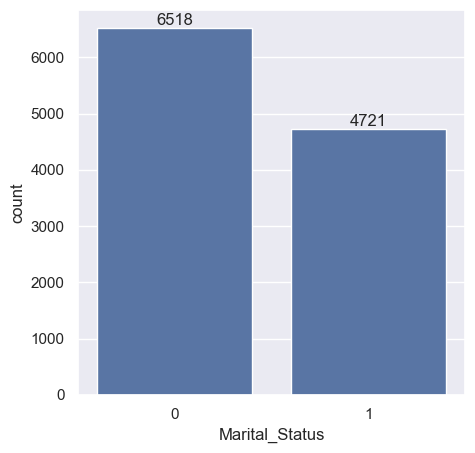

In [47]:
ax = sns.countplot(data = data, x = 'Marital_Status')
sns.set(rc = {'figure.figsize':(5,5)}) 
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show() 


<Axes: xlabel='Marital_Status', ylabel='Amount'>

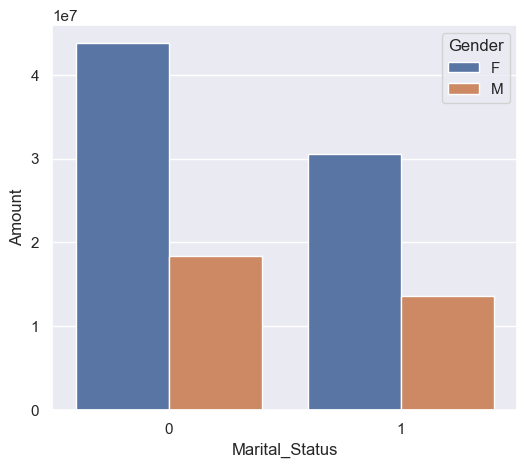

In [48]:
sales_state = data.groupby(['Marital_Status' , 'Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc = {'figure.figsize' : (6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status' , y = 'Amount' , hue= 'Gender')

Occupation

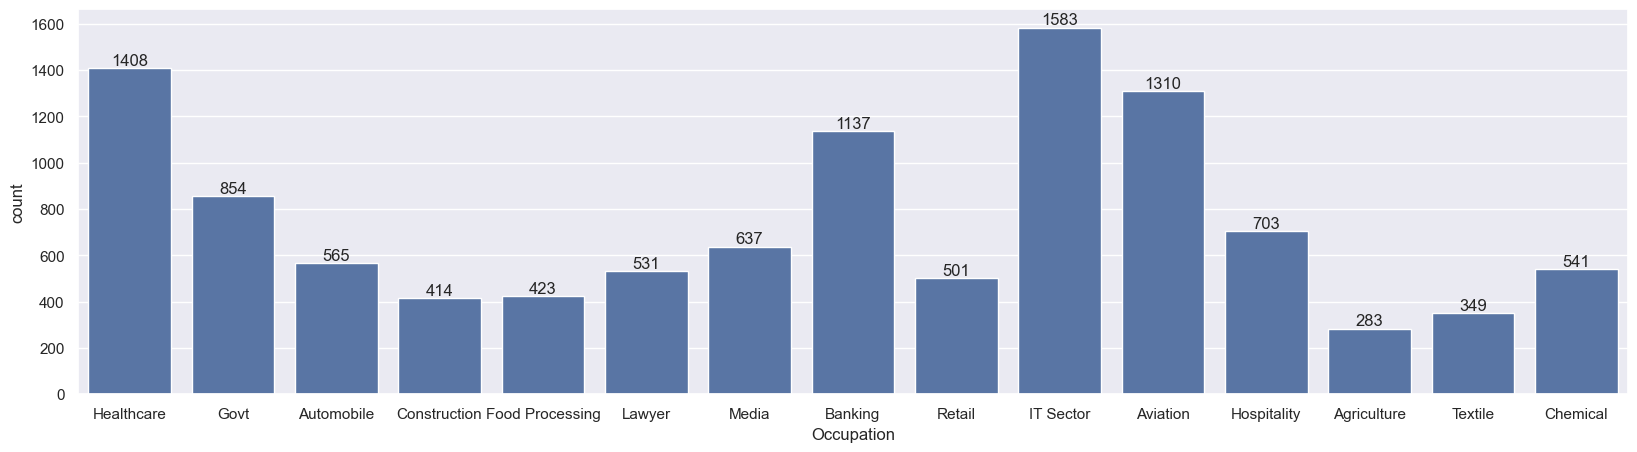

In [49]:
sns.set(rc = {'figure.figsize' : (20,5)})
ax = sns.countplot(data = data, x ='Occupation')
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show() 


<Axes: xlabel='Occupation', ylabel='Amount'>

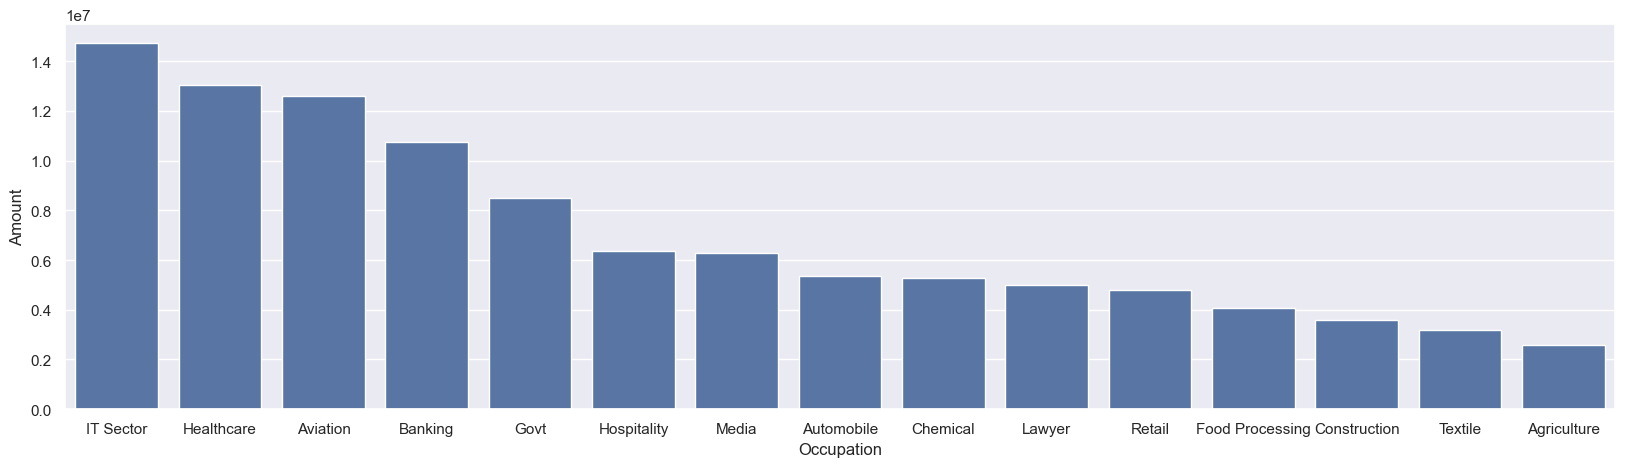

In [53]:
sales_state = data.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(data = sales_state, x = 'Occupation' , y = 'Amount')

Product Category

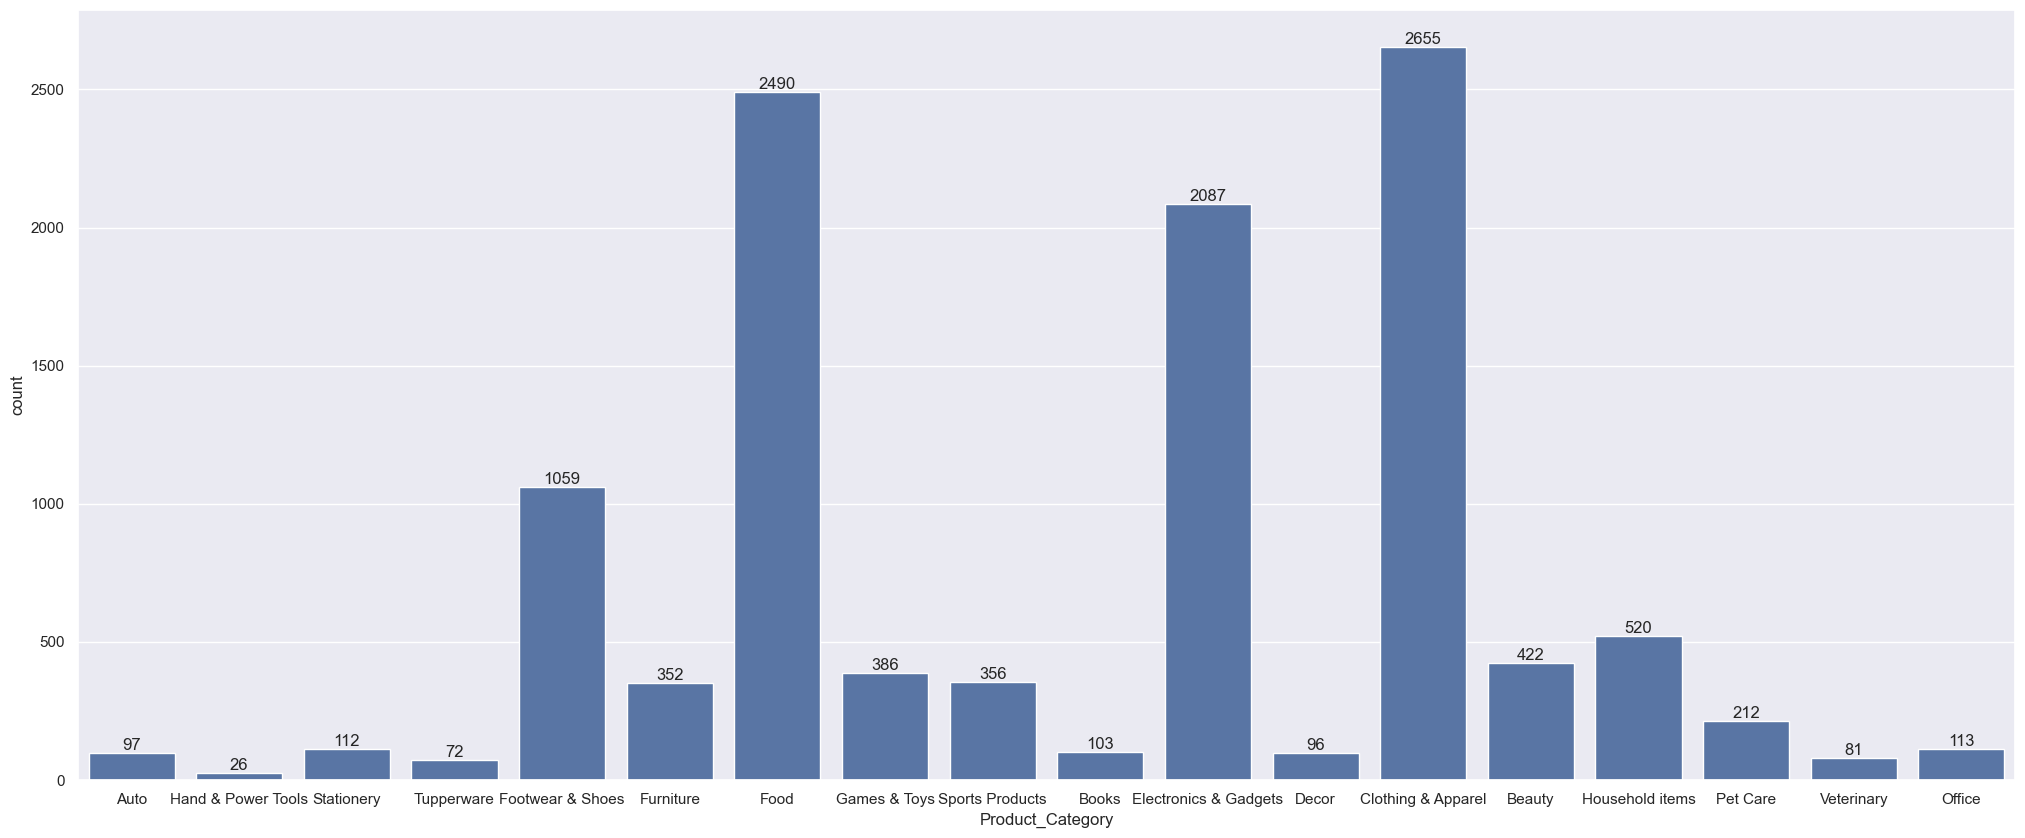

In [59]:
sns.set(rc = {'figure.figsize' : (25,10)})
ax = sns.countplot(data = data, x ='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show() 

<Axes: xlabel='Product_Category', ylabel='Amount'>

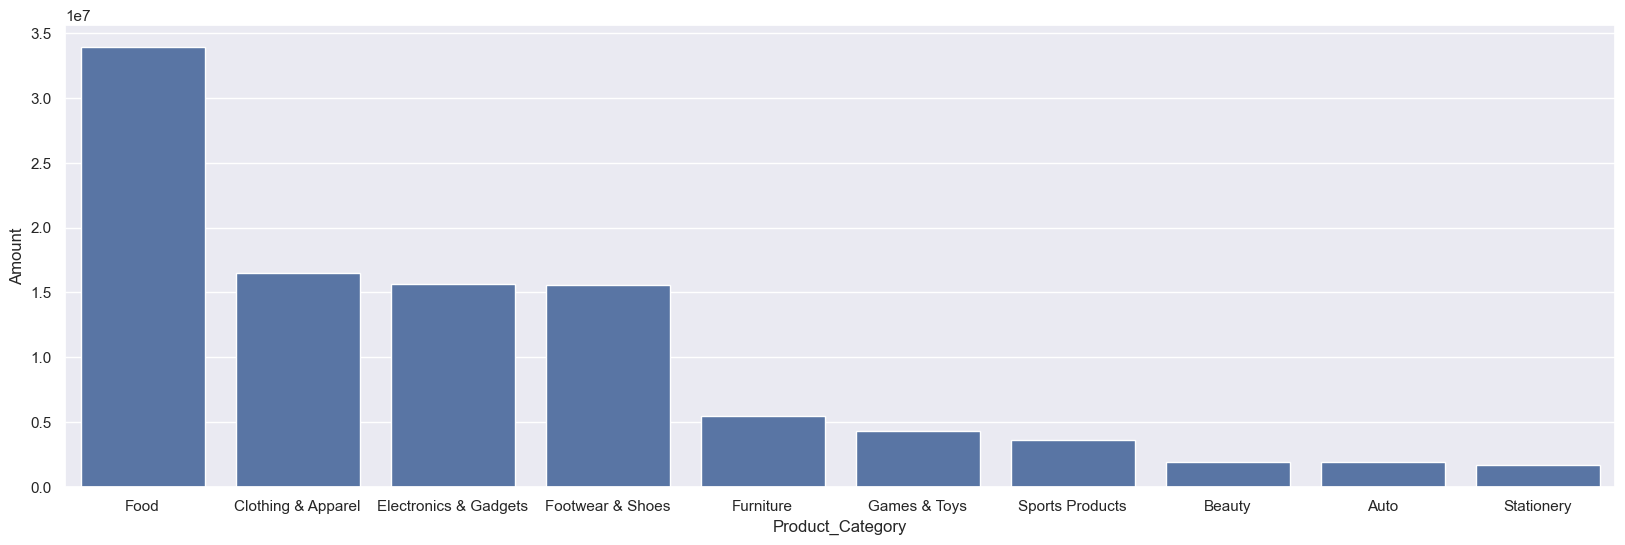

In [63]:
sales_state = data.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (20,6)})
sns.barplot(data = sales_state, x = 'Product_Category' , y = 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

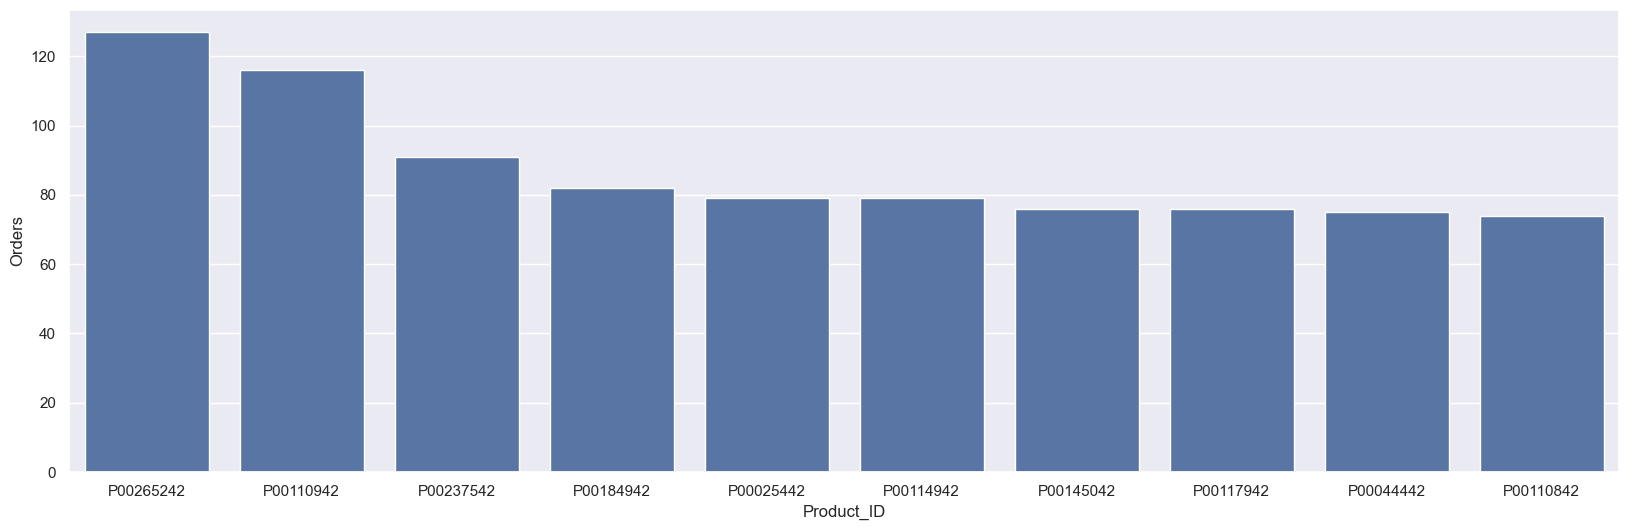

In [64]:
sales_state = data.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (20,6)})
sns.barplot(data = sales_state, x = 'Product_ID' , y = 'Orders')

<Axes: xlabel='Product_ID'>

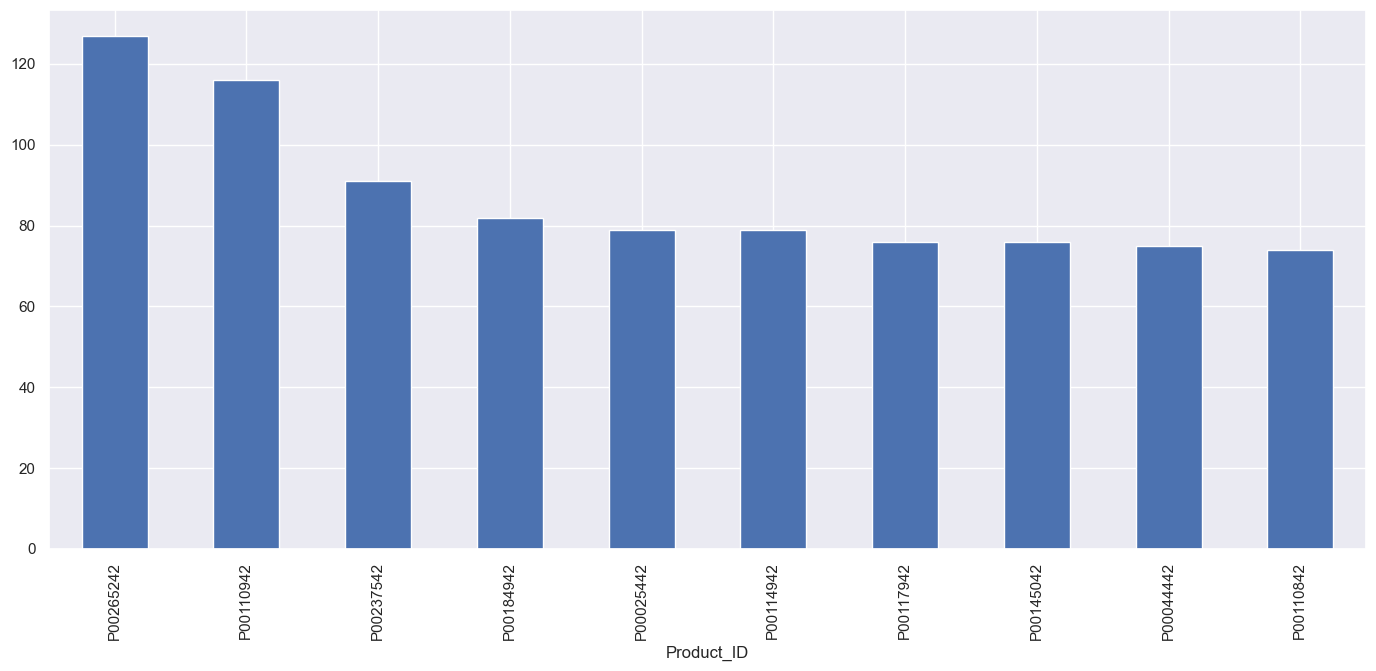

In [67]:
#top 10 most sold product(same as above)
fig1, ax1 = plt.subplots(figsize=(17,7)) 
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')